In [1]:
import praw

reddit = praw.Reddit(client_id=username, \
                     client_secret=key, \
                     user_agent=appname, \
                     username=appname, \
                     password=password)

Megasub=reddit.subreddit('relationships+relationship_advice+AmITheAsshole')

In [32]:
d={x:[] for x in ['code','title','body','subreddit','score']}
for submission in Megasub.top('year',limit=1000):
    d['code'].append(submission.id)
    d['title'].append(submission.title)
    d['body'].append(submission.selftext)
    d['subreddit'].append(submission.subreddit)
    d['score'].append(submission.score)
    


In [33]:
for submission in Megasub.controversial('year',limit=500):
    d['code'].append(submission.id)
    d['title'].append(submission.title)
    d['body'].append(submission.selftext)
    d['subreddit'].append(submission.subreddit)
    d['score'].append(submission.score)
    
for submission in Megasub.new(limit=500):
    d['code'].append(submission.id)
    d['title'].append(submission.title)
    d['body'].append(submission.selftext)
    d['subreddit'].append(submission.subreddit)
    d['score'].append(submission.score)

In [34]:
import pandas as pd

df=pd.DataFrame(d,columns=['code','title','body','subreddit','score'])

In [151]:
print(sum(df.code.duplicated()))
df.head()

0


,code,title,body,subreddit,score,Gender
0,hu3e0a,[UPDATE] I (29F) keep finding long hairs in my...,[https://www.reddit.com/r/relationship\_advic...,relationship_advice,123695,F
1,hmzvgt,Update: My (32F) husband (36M) became a robot ...,\n[original:](https://www.reddit.com/r/relatio...,relationship_advice,113633,F
2,hjkgnj,UPDATE: My girlfriend told me she was with a f...,Original post: https://www.reddit.com/r/relati...,relationship_advice,112024,M
3,fwog3j,"UPDATE: my son and his ""friend"" are a couple. ...",I tried yo post this before but it got removed...,relationship_advice,90675,0
4,d6xoro,META: This sub is moving towards a value syste...,I’ve enjoyed reading and posting on this sub f...,AmItheAsshole,80923,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
code         2000 non-null object
title        2000 non-null object
body         2000 non-null object
subreddit    2000 non-null object
score        2000 non-null int64
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [37]:
import pickle

with open('reldf.pickle', 'wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [40]:
df.describe()

,score
count,2000.000000
mean,12167.361500
std,14185.209358
min,0.000000
25%,2.000000
50%,9871.500000
75%,21339.500000
max,123695.000000


In [74]:
for title in df.title:
    print(title)

[UPDATE] I (29F) keep finding long hairs in my bathroom, which is strange because my husband (32M) is bald and I have a short pixie crop hairstyle
Update: My (32F) husband (36M) became a robot and I don’t know how to help him.
UPDATE: My girlfriend told me she was with a friend, but that friend was with me picking out an engagement ring. How do I confront my girlfriend about her lie?
UPDATE: my son and his "friend" are a couple. How do I let them know it's okay?
META: This sub is moving towards a value system that frequently doesn't align with the rest of the world
My (22M) vegan girlfriend (21F) wants me to get rid of my cat. UPDATE
Update: My [36M] wife [34F] keeps tying my boots after I've told her to keep her hands off of them. I tried to teach her a lesson and really hurt her feelings.
I (M28) broke up with my ex-fiancée (F27) of 4 years 2 weeks ago after catching her in a huge lie and then finding out 3 days ago that she commited suicide because i wouldn't take her back. I am in 

My Ex Girlfriend's sister who goes to college with me + Covid
Friendship advice
AITA not giving up my room for my roommate's dad?
AITA for letting my dog jump on my dad's car?
I can't get over the death of the teacher I loved.
I (21m) lost my AirPods that my girlfriend (23f) bought, for a second time.
tired of being used
Please help
My boyfriend wants to slow things down and I'm irritated
Ex [17f] being in the same friendship group as me [17m]- advice/experience
Ex shared my nudes as “art”
Has anyone been with/ or is currently with a verbally abusive partner?
Break up of two years
AITA For telling my colleague what I felt due to his interruptions?
Cheated BF in the same classes with girl that he cheated with
Me [28F] and my bohfriend [33M] don't talk much lately maybe because of the conflicts with our work schedule.
AITA for not selling the house my family inherited because I want to focus on houses that I will get a commissions for selling?
18 year old virgin
Keeping Secret that Hurts

In [142]:
import re

Mpattern=re.compile('((i)|(I)|(me)|(Me)|(My)|(my))(\s?)(\[|\(|\{)(m|M|(\d\dm)|(\d\dM))')
Fpattern=re.compile('((i)|(I)|(me)|(Me)|(My)|(my))(\s?)(\[|\(|\{)(f|F|(\d\df)|(\d\dF))')
Mrelationships=re.compile('((wife)|(girlfriend)|(Wife)|(Girlfriend)|(gf)|(Gf)|(GF))')
Frelationships=re.compile('((husband)|(boyfriend)|(Husband)|(Boyfriend)|(bf)|(Bf)|(BF))')


Gender=[]

for idx in df.index:
    if Mpattern.search(df.title[idx])  or Mpattern.search(df.body[idx]) : 
        Gender.append('M')
    elif Fpattern.search(df.title[idx]) or Fpattern.search(df.body[idx]): 
        Gender.append("F")
    elif Mrelationships.search(df.title[idx]):
        Gender.append('M')
    elif Frelationships.search(df.title[idx]):
        Gender.append('F')   
    else:
        Gender.append(0)

df['Gender']=Gender
df.Gender.value_counts()

0    936
F    552
M    512
Name: Gender, dtype: int64

In [143]:
for idx in df.index:
    if df.Gender[idx]==0:print(df.title[idx])

UPDATE: my son and his "friend" are a couple. How do I let them know it's okay?
META: This sub is moving towards a value system that frequently doesn't align with the rest of the world
AITA for pretending to get fired when customers get a temper with me?
My son and his "friend" are a couple. How do I let them know it's okay?
UPDATE: WIBTA if I took over planning my own funeral from my very religious parents?
AITA for making a dad joke?
WIBTA for refusing to stop cooking bacon in my kitchen due to my teenage daughters vegan lifestyle?
Aita for wearing the “joke” bikini my friend got me?
UPDATE WIBTA For planting prickly bushes in my front yard to keep the neighbours kids from my property?
UPDATE AITA for not sharing my medical history before being pranked?
AITA for switching to regular milk to prove my lactose intolerant roommate keeps stealing from me?
AITA - Telling my parents to pay me back my college tuition if they want a relationship
AITA for jumping out of a bathroom window to av

In [144]:
for idx in df.index:
    if df.Gender[idx]=='F':print(df.title[idx])

[UPDATE] I (29F) keep finding long hairs in my bathroom, which is strange because my husband (32M) is bald and I have a short pixie crop hairstyle
Update: My (32F) husband (36M) became a robot and I don’t know how to help him.
[UPDATE] My grandparents don’t approve of my relationship with my black boyfriend, and don’t want me (F24) to marry him (26). I don’t know what to do, since I don’t want to lose either of these people (my boyfriend and my grandparents).
My boyfriend isn’t okay with me being promiscuous in the past. [Update]
AITA for punishing my son after he said something racist?
UPDATE: My (26F) boyfriend (35m) choked me until I passed out during sex, waited until he "finished" to check on me.
My (28f) dog attacked my stalker after he broke into my house. Now my SIL (32f) says my dog is "too dangerous" to be around my niece (4f). Feel like I'm going crazy.
AITA for telling the girl who kissed my boyfriend for a play that she is desperate and pathetic?
My boyfriend (35m) drugged

In [145]:
for idx in df.index:
    if df.Gender[idx]=='M':print(df.title[idx])

UPDATE: My girlfriend told me she was with a friend, but that friend was with me picking out an engagement ring. How do I confront my girlfriend about her lie?
My (22M) vegan girlfriend (21F) wants me to get rid of my cat. UPDATE
Update: My [36M] wife [34F] keeps tying my boots after I've told her to keep her hands off of them. I tried to teach her a lesson and really hurt her feelings.
I (M28) broke up with my ex-fiancée (F27) of 4 years 2 weeks ago after catching her in a huge lie and then finding out 3 days ago that she commited suicide because i wouldn't take her back. I am in need of some serious advice as i'm being blamed for everything.
AITA For suing my girlfriend after she had my 1967 impala project taken to the scrapyard?
Update: My dad's (43) girlfriend is trying to get rid of me (15 f).
[UPDATE] You were right. I ignored every single one of your comments and eventually caught my wife with the other man
UPDATE: My(m21) gf(f23) obsession with Pokemon is embarrassing me
Update

In [146]:
df.head(10)

,code,title,body,subreddit,score,Gender
0,hu3e0a,[UPDATE] I (29F) keep finding long hairs in my...,[https://www.reddit.com/r/relationship\_advic...,relationship_advice,123695,F
1,hmzvgt,Update: My (32F) husband (36M) became a robot ...,\n[original:](https://www.reddit.com/r/relatio...,relationship_advice,113633,F
2,hjkgnj,UPDATE: My girlfriend told me she was with a f...,Original post: https://www.reddit.com/r/relati...,relationship_advice,112024,M
3,fwog3j,"UPDATE: my son and his ""friend"" are a couple. ...",I tried yo post this before but it got removed...,relationship_advice,90675,0
4,d6xoro,META: This sub is moving towards a value syste...,I’ve enjoyed reading and posting on this sub f...,AmItheAsshole,80923,0
5,hxuhig,My (22M) vegan girlfriend (21F) wants me to ge...,Original post:\n\nhttps://www.reddit.com/r/rel...,relationship_advice,74256,M
6,gxh3g6,Update: My [36M] wife [34F] keeps tying my boo...,[Original](https://old.reddit.com/r/relationsh...,relationship_advice,71090,M
7,czhvrp,I (M28) broke up with my ex-fiancée (F27) of 4...,"Hey guys,\n\nI need some serious advice as i'm...",relationship_advice,68526,M
8,gr8bp3,AITA For suing my girlfriend after she had my ...,I'll try to keep this short. I had a [1967 Imp...,AmItheAsshole,68548,M
9,i76nal,Update: My dad's (43) girlfriend is trying to ...,[op](https://www.reddit.com/r/relationship_adv...,relationship_advice,66939,M


In [157]:
cheat_flag=re.compile('cheat')
abuse_flag=re.compile('abus') 

cheat_vec=[]
abuse_vec=[]

for idx in df.index:
    if cheat_flag.search(df.title[idx]) or cheat_flag.search(df.body[idx]):
        cheat_vec.append(1)
    else:
        cheat_vec.append(0)
    if abuse_flag.search(df.title[idx]) or abuse_flag.search(df.body[idx]):
        abuse_vec.append(1)
    else:
        abuse_vec.append(0)
        
print(sum(cheat_vec))
sum(abuse_vec)

df['cheat']=cheat_vec
df['abuse']=abuse_vec



155
106     Update: My(F24) boyfriend(28) if 10 years has ...
124     UPDATE: AITA for shouting at my ex in front of...
139     (UPDATE) My stepfather killed my mother and th...
456     UPDATE: Just found out my (23M) best friend (2...
604     AITA for not reacting well when I found out my...
725     AITA for telling my STB ex-husband he will not...
808     Update: my wife said something strange about h...
985     Update I (26f) am an escort and I am falling i...
1122    [50M] husband cheating on his [48F] wife. He i...
1192    I was a huge asshole to my new boyfriend and I...
1394    My [19F] Girlfriend is going on a trip to see ...
1434    Update: My (50m) son (20m) is upset I want to ...
1582    Found out girlfriend (27F) wants to propose, I...
1619    Found out girlfriend (27F) wants to propose, I...
1627                               What is wrong with me?
1825    AITA for refusing to apologize for calling my ...
1883                         Past coming back to haunt me
1885    Sh

In [162]:
for idx in df.index:
    if df.cheat[idx]==1 and df.abuse[idx]==1:
        print(df.title[idx])

Update: My(F24) boyfriend(28) if 10 years has become incredibly secretive of his phone, laptop, social media, and car
UPDATE: AITA for shouting at my ex in front of my daughters?
(UPDATE) My stepfather killed my mother and then killed himself. I don't know what to do.
UPDATE: Just found out my (23M) best friend (23M) has been secretly dating my ex (24F) for months
AITA for not reacting well when I found out my coworker is dating my ex-husband?
AITA for telling my STB ex-husband he will not be allowed in the birthing room?
Update: my wife said something strange about her ex, and it's really getting to me (I'm 31M, she's 31F)
Update I (26f) am an escort and I am falling in love with one of my clients (39M)
[50M] husband cheating on his [48F] wife. He intends to move with the girlfriend and her two young kids just after a few months of dating.
I was a huge asshole to my new boyfriend and I don't know how to make it up to him
My [19F] Girlfriend is going on a trip to see a "Online Friend" 

In [165]:
cheat_df=df[df.cheat==1]
abuse_df=df[df.abuse==1]

cheat_df.head()
abuse_df.head()

,code,title,body,subreddit,score,Gender,cheat,abuse
36,hpf5l4,My (28f) dog attacked my stalker after he brok...,This is kind of a complicated story but I’ll j...,relationship_advice,45066,F,0,1
53,i81zi9,UPDATE: AITA for sleeping top naked in my bedr...,UPDATE: AITA for sleeping top naked in my room...,AmItheAsshole,41416,0,0,1
61,gpa82s,My [36M] wife [34F] keeps tying my boots after...,"Yes, I know the title is bizarre and I can't b...",relationship_advice,39727,M,0,1
72,ic4aos,My [23F] boyfriend [25M] used the dog's saving...,I know the title is a little odd but it was th...,relationship_advice,38261,F,0,1
80,czqc2i,"UPDATE: My childhood ""friend"" went through my ...",[Link to Original](https://www.reddit.com/r/re...,relationship_advice,37216,F,0,1


In [166]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dkond\AppData\Roaming\nltk_data...


C:\Users\dkond\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [217]:
from praw.models import MoreComments
import numpy as np


cheat_df['valence']=None
abuse_df['valence']=None

cheat_val_list=[]

for idx in cheat_df.index:

    code=cheat_df.code[idx]
    submission=reddit.submission(id=code)
    submission.comment_sort='best'
    submission.comment_limit=5
    Valences=[]
    for comment in submission.comments:
        
        if isinstance(comment, MoreComments): continue
        Valences.append(sid.polarity_scores(comment.body)['compound'])
        cheat_val_list.append(sid.polarity_scores(comment.body)['compound'])
    cheat_df.valence[idx]=np.mean(Valences)
    
    

C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [218]:
abuse_val_list=[]
for idx in abuse_df.index:
    code=abuse_df.code[idx]
    submission=reddit.submission(id=code)
    submission.comment_sort='best'
    submission.comment_limit=10
    Valences=[]
    for comment in submission.comments:
        if isinstance(comment, MoreComments): continue
        Valences.append(sid.polarity_scores(comment.body)['compound'])
        abuse_val_list.append(sid.polarity_scores(comment.body)['compound'])
    abuse_df.valence[idx]=np.mean(Valences)
    

C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\dkond\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dkond\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dkond\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


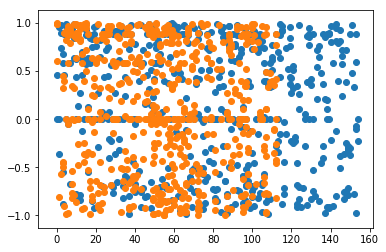

In [194]:
import matplotlib.pyplot as plt

cheat_val_dic={'x':[],'y':[]}

for key,vec in enumerate(cheat_df.valence):
    for v in vec:
        cheat_val_dic['x'].append(key)
        cheat_val_dic['y'].append(v)

plt.scatter(cheat_val_dic['x'],cheat_val_dic['y'])

abuse_val_dic={'x':[],'y':[]}

for key,vec in enumerate(abuse_df.valence):
    for v in vec:
        abuse_val_dic['x'].append(key)
        abuse_val_dic['y'].append(v)

plt.scatter(abuse_val_dic['x'],abuse_val_dic['y'])
plt.show()

C:\Users\dkond\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dkond\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dkond\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


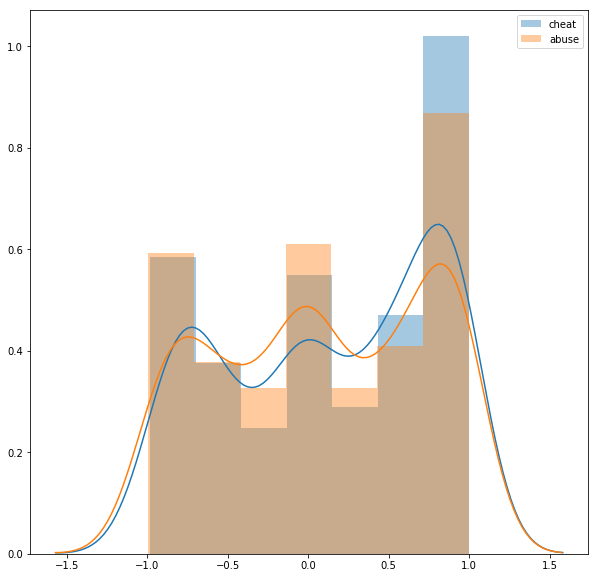

In [220]:
import seaborn as sns

plt.figure(figsize=(10,10))

sns.distplot(cheat_val_list,label='cheat')
sns.distplot(abuse_val_list,label='abuse')
plt.legend()
plt.show()

In [221]:
from scipy.stats import ks_2samp

ks_2samp(cheat_val_list, abuse_val_list)

Ks_2sampResult(statistic=0.06198608475648326, pvalue=0.24086488417812124)

C:\Users\dkond\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dkond\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dkond\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


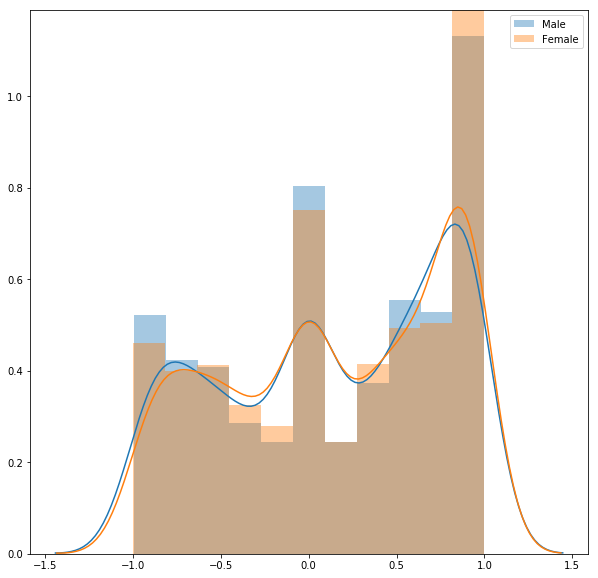

In [223]:
Mdf=df[df.Gender=='M']
Fdf=df[df.Gender=='F']

Mvalences=[]
Fvalences=[]

for idx in Mdf.index:

    code=Mdf.code[idx]
    submission=reddit.submission(id=code)
    submission.comment_sort='best'
    submission.comment_limit=5
    for comment in submission.comments:
        
        if isinstance(comment, MoreComments): continue
        Mvalences.append(sid.polarity_scores(comment.body)['compound'])

    

for idx in Fdf.index:

    code=Fdf.code[idx]
    submission=reddit.submission(id=code)
    submission.comment_sort='best'
    submission.comment_limit=5
    for comment in submission.comments:
        
        if isinstance(comment, MoreComments): continue
        Fvalences.append(sid.polarity_scores(comment.body)['compound'])

    
plt.figure(figsize=(10,10))

sns.distplot(Mvalences,label='Male')
sns.distplot(Fvalences,label='Female')
plt.legend()
plt.show()  

In [224]:
ks_2samp(Mvalences, Fvalences)

Ks_2sampResult(statistic=0.023892371995820283, pvalue=0.6598039075044333)